In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import io
import requests
import re
import warnings
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from bayes_opt import BayesianOptimization
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## EDA

In [3]:
train.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [6]:
train.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

In [7]:
test.nunique()

id                     106171
age                        18
height(cm)                 16
weight(kg)                 26
waist(cm)                 508
eyesight(left)             20
eyesight(right)            18
hearing(left)               2
hearing(right)              2
systolic                  114
relaxation                 78
fasting blood sugar       224
Cholesterol               227
triglyceride              392
HDL                       106
LDL                       219
hemoglobin                132
Urine protein               6
serum creatinine           26
AST                       135
ALT                       174
Gtp                       332
dental caries               2
dtype: int64

In [8]:
train=train.set_index('id')
test=test.set_index('id')

In [9]:
train.columns[:-1]

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [10]:
conti_feature=['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp']

In [11]:
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [12]:
y=train.iloc[:,-1]
x=train.iloc[:,:-1]

In [13]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

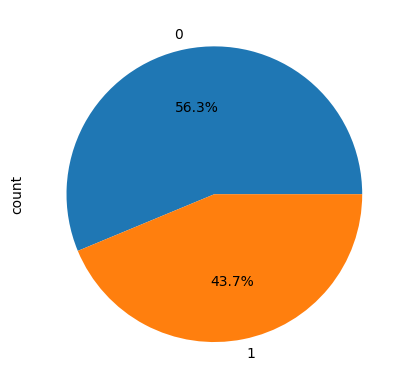

In [14]:
train['smoking'].value_counts().plot(kind='pie',autopct='%.1f%%')
# plt.title('')
plt.show()

In [15]:
test.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')

In [16]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [17]:
train_ana=x.copy()
test_ana=test.copy()

train_ana['label']='train'
test_ana['label']='test'

In [18]:
all_data=pd.concat([train_ana,test_ana])

In [19]:
all_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,label
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,train
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,train
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,train
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,train
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,train


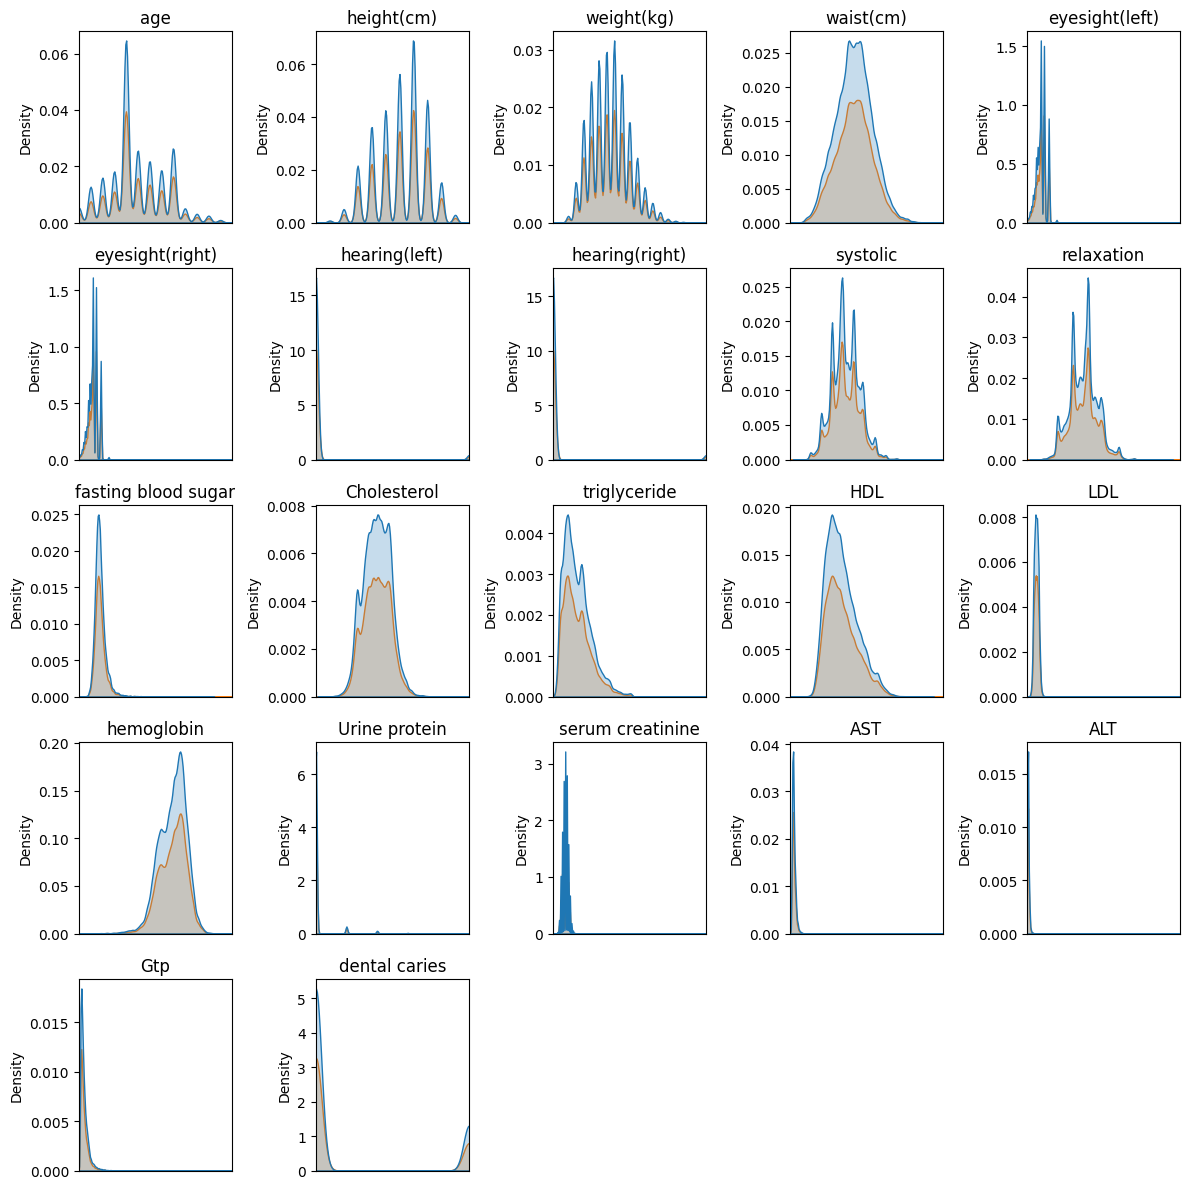

In [20]:

features = all_data.columns[:-1]

num_rows = 5
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    
    
    ax = axes[row, col]
    
    sns.kdeplot(data=all_data, x=feature, hue='label', ax=ax, shade=True, legend=False)
    
    
    ax.set_xlim(all_data[feature].min(), all_data[feature].max())
    
    ax.set_title('{}'.format(feature))
    
    ax.set_xticks([])
    ax.set_xlabel('')

    

for i in range(len(features), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()

plt.show()

In [21]:
all_data.nunique()

age                     21
height(cm)              18
weight(kg)              32
waist(cm)              541
eyesight(left)          21
eyesight(right)         19
hearing(left)            2
hearing(right)           2
systolic               120
relaxation              81
fasting blood sugar    239
Cholesterol            241
triglyceride           396
HDL                    112
LDL                    235
hemoglobin             138
Urine protein            6
serum creatinine        28
AST                    154
ALT                    193
Gtp                    389
dental caries            2
label                    2
dtype: int64

In [22]:
all_data.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'label'],
      dtype='object')

## Data preprocessing

In [23]:
model_data=all_data.copy()

In [24]:
le = LabelEncoder()
model_data['age'] = le.fit_transform(model_data['age'])
model_data['height(cm)'] = le.fit_transform(model_data['height(cm)'])
model_data['weight(kg)'] = le.fit_transform(model_data['weight(kg)'])
model_data['waist(cm)'] = le.fit_transform(model_data['waist(cm)'])
model_data['eyesight(left)'] = le.fit_transform(model_data['eyesight(left)'])
model_data['eyesight(right)'] = le.fit_transform(model_data['eyesight(right)'])
model_data['systolic'] = le.fit_transform(model_data['systolic'])
model_data['relaxation'] = le.fit_transform(model_data['relaxation'])
model_data['fasting blood sugar'] = le.fit_transform(model_data['fasting blood sugar'])
model_data['Cholesterol'] = le.fit_transform(model_data['Cholesterol'])
model_data['triglyceride'] = le.fit_transform(model_data['triglyceride'])
model_data['HDL'] = le.fit_transform(model_data['HDL'])
model_data['LDL'] = le.fit_transform(model_data['LDL'])
model_data['hemoglobin'] = le.fit_transform(model_data['hemoglobin'])
model_data['Urine protein'] = le.fit_transform(model_data['Urine protein'])
model_data['serum creatinine'] = le.fit_transform(model_data['serum creatinine'])
model_data['AST'] = le.fit_transform(model_data['AST'])
model_data['ALT'] = le.fit_transform(model_data['ALT'])
model_data['Gtp'] = le.fit_transform(model_data['Gtp'])

In [26]:
model_data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,label
id,,,,,,,,,,,,,,,,,,,,,
0,9,10,6,226,4,5,1,1,59,44,...,20,61,105,0,9,16,24,24,0,train
1,16,10,8,306,5,6,2,2,70,40,...,37,112,102,0,10,21,22,34,1,train
2,0,11,10,226,3,4,1,1,42,32,...,25,79,114,0,7,21,30,50,0,train
3,4,14,22,463,13,10,1,1,55,45,...,18,88,99,0,9,14,26,27,1,train
4,3,10,6,221,13,9,1,1,45,33,...,24,79,94,0,7,13,12,14,0,train


In [27]:
model_train=model_data[model_data['label']=='train'].drop('label', axis=1)
model_test=model_data[model_data['label']=='test'].drop('label', axis=1)

In [28]:
model_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
id,,,,,,,,,,,,,,,,,,,,,
0,9,10,6,226,4,5,1,1,59,44,...,291,20,61,105,0,9,16,24,24,0
1,16,10,8,306,5,6,2,2,70,40,...,46,37,112,102,0,10,21,22,34,1
2,0,11,10,226,3,4,1,1,42,32,...,188,25,79,114,0,7,21,30,50,0
3,4,14,22,463,13,10,1,1,55,45,...,194,18,88,99,0,9,14,26,27,1
4,3,10,6,221,13,9,1,1,45,33,...,78,24,79,94,0,7,13,12,14,0


## Model selection

In [29]:
#RandomForest
rf = RandomForestClassifier()
print(np.mean(cross_val_score(rf, model_train, y, cv=StratifiedKFold(n_splits=20), scoring='accuracy')))

0.7754433355941664


In [30]:
#XGBoost
xgb = XGBClassifier(objective='binary:logistic')
print(np.mean(cross_val_score(xgb, model_train, y, cv=StratifiedKFold(n_splits=20), scoring='accuracy')))

0.7816660122647754


In [31]:
# from sklearnex import patch_sklearn
# patch_sklearn()
# svc = SVC(kernel='rbf', probability=True) 
# print(np.mean(cross_val_score(svc, model_train, y, cv=StratifiedKFold(n_splits=20), scoring='accuracy')))

In [32]:
#Logistic
logreg = LogisticRegression(solver='liblinear')
print(np.mean(cross_val_score(logreg, model_train, y, cv=StratifiedKFold(n_splits=20), scoring='accuracy')))

0.7478839893550625


In [33]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
print(np.mean(cross_val_score(knn, np.array(model_train,dtype='float32'), np.array(y,dtype='float32'), cv=StratifiedKFold(n_splits=20), scoring='accuracy',error_score="raise")))

0.7017129154832938
